In [2]:
import pymysql
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
conn = pymysql.connect(host='localhost', port=int(3306), user='root', passwd='spartandb', db='spartan')

In [4]:
data = pd.read_sql_query('SELECT * FROM bastazo_common_vulnerabilityfromnvd', conn)

In [10]:
data.columns

Index(['id', 'is_new', 'is_update', 'cve_id', 'cvss_3', 'attack_from_where',
       'attack_complexity', 'user_interaction', 'privileges_required',
       'confidentiality_impact', 'integrity_impact', 'availability_impact',
       'cvss_base_score', 'cvss_base_severity', 'cvss_exploitability_score',
       'cvss_impact_score', 'published_date', 'last_modified_date',
       'description', 'exploitability', 'exploit_id'],
      dtype='object')

In [143]:
test = data['published_date']

In [144]:
df = pd.DataFrame(test)

In [145]:
df['year'] = df['published_date'].map(lambda x: x.year)
df['month'] = df['published_date'].map(lambda x: x.month)
df['period'] = pd.to_datetime(df['published_date']).dt.strftime('%Y-%m')

In [146]:
df.drop('published_date', axis=1, inplace=True)

In [147]:
result = df.groupby(['year','month','period'], as_index=False).size()

In [148]:
result.sort_values(['period'], ascending=False)
result_final = result[result['year']>=2019]

In [154]:
result_final.drop(result_final.index[-1], inplace=True)

c:\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


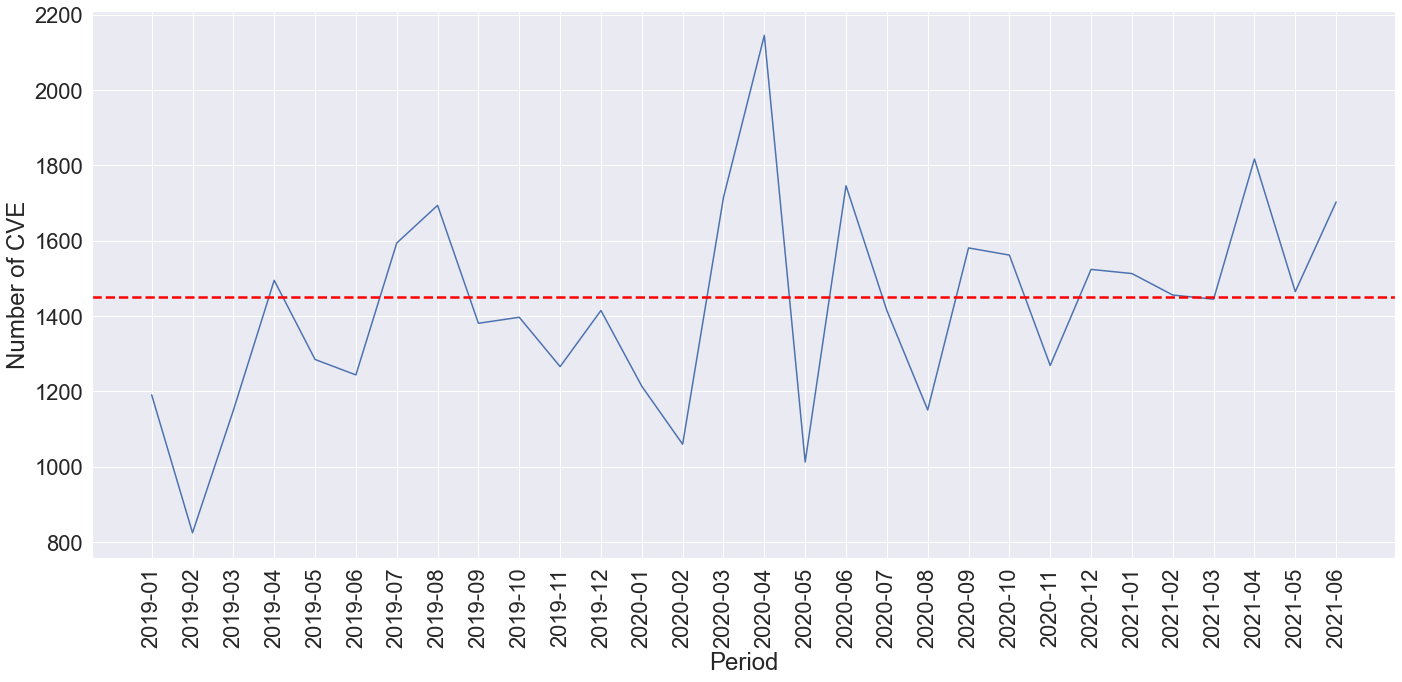

In [174]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.set(font_scale=2)
sns.lineplot(x='period', y='size', data=result_final)
plt.xlabel('Period')
plt.ylabel('Number of CVE')
plt.axhline(y=1450,
            color='red',
            ls='--', 
            lw=2.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [6]:
data2 = data
test2 = data['published_date']
df = pd.DataFrame(test2)
df['year'] = df['published_date'].map(lambda x: x.year)

In [12]:
# df.drop('published_date', axis=1, inplace=True)
result = df.groupby(['year'], as_index=False).size()
result.sort_values(['year'], ascending=False)
result_final = result[result['year']>=2017]

In [18]:
result_final

,year,size
7,2017,10834
8,2018,15273
9,2019,15937
10,2020,17395
11,2021,9456


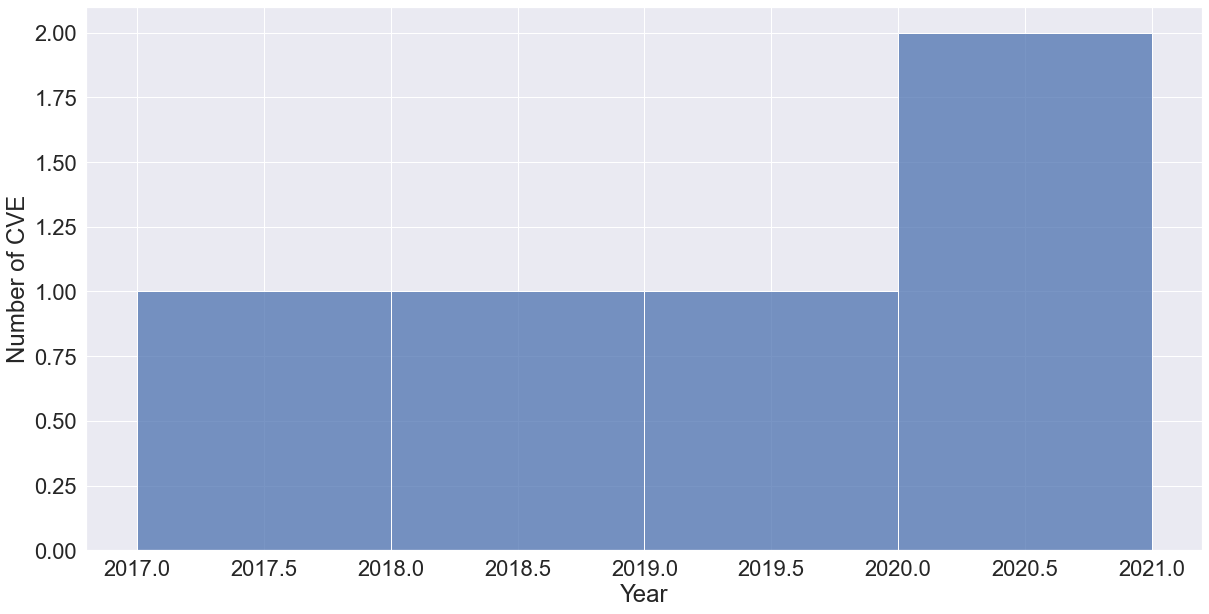

In [17]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.set(font_scale=2)
sns.histplot(x='year', data=result_final)
plt.xlabel('Year')
plt.ylabel('Number of CVE')
plt.show()